# NB: Exploring Pandas

Programming for Data Science

Let's explore Pandas in more depth using the Iris dataset.

This is a well-known demonstration dataset produced by R.A. Fischer, a notable figure in the history of statistics.

This dataset contains $150$ observations on four features for three types of iris.

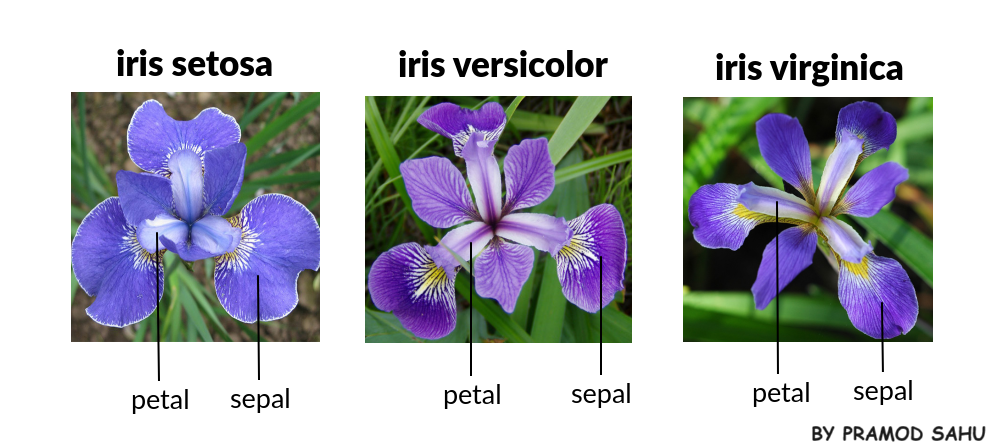

## Load Iris Dataset

We'll grab the dataset from the Seaborn visualization package.

The function `load_dataset()` in `seaborn` loads the built-in dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
iris.shape

(150, 5)

## Heads and Tails

We can quickly inspect the data with `.head()` and `.tail()`.

As we saw with Series, `.head()` returns the first $5$ rows and `.tail()` the last.

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


You can return fewer or more rows by passing a different positive integer to these methods, e.g. `.head(10)`.

In [5]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Naming Indexes

We can name indexes, which is important to do in many cases.

In [6]:
iris.index.name = 'obs_id' # Each observation is a unique plant

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


## Using a MultiIndex

We can also redefine indexes to reflect **the logic of our data**.

In this data set, the species of the flower is part of its **identity**, so it can be part of the index.

The other features vary by individual. 

Note that `species` is also a **label** that can be used for training a model to predict the species of an iris flower. In that use case, the column would be pulled out into a separate vector.

In [8]:
iris_w_idx = iris.reset_index().set_index(['species','obs_id'])

In [9]:
iris_w_idx.sample(10)

sepal_length  sepal_width  petal_length  petal_width
species    obs_id                                                      
setosa     39               5.1          3.4           1.5          0.2
versicolor 82               5.8          2.7           3.9          1.2
virginica  124              6.7          3.3           5.7          2.1
setosa     10               5.4          3.7           1.5          0.2
           41               4.5          2.3           1.3          0.3
virginica  117              7.7          3.8           6.7          2.2
versicolor 89               5.5          2.5           4.0          1.3
virginica  123              6.3          2.7           4.9          1.8
setosa     4                5.0          3.6           1.4          0.2
versicolor 65               6.7          3.1           4.4          1.4

## Row Selection (Filtering) 

### `.iloc[]`

You can extract rows using **indexes** with `.iloc[]`. 

This works by indexing rows by their numeric sequence value.

This fetches row 3, and all columns.

In [10]:
iris.iloc[2]

sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object

We can use a slice to fetch rows with indices 1 and 2 (the right endpoint is exclusive), and all columns.

In [11]:
iris.iloc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Combining Filtering and Selecting

Recall the **comma notation** from NumPy &mdash; it is used here, too.

The first element is a **row selector**, the second a **column selector**.

In database terminology, row selection is called filtering.

Here we fetch rows 1 and 2 with and first three columns.

In [12]:
iris.iloc[1:3, 0:3]

,sepal_length,sepal_width,petal_length
obs_id,,,
1,4.9,3.0,1.4
2,4.7,3.2,1.3


### `.loc[]`

Filtering can also be done with `.loc[]`. 

This uses the row names and column names.

Here we ask for rows with labels 1, 2, and 3.

Note the slice returns the row with `obs_id` 3.

`.iloc[]` would return rows with indices 1, 2.

In [13]:
iris.loc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [14]:
iris.loc[1:3, ['sepal_width','sepal_length']]

,sepal_width,sepal_length
obs_id,,
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6


The different behavior of the slice with `.loc`, `1:3` is due to the fact that it is short-hand for `[1,2,3]`, a list of labels, not a range of offsets.

In [15]:
iris.loc[[1,2,3]]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


So, for example, since there is no label value `-1`, this won't work:

In [73]:
iris.loc[:-1]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,


Here we subset on columns with column names as a list of strings:

In [18]:
iris.loc[1:3, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2


Here we select all rows, specific columns:

In [19]:
iris.loc[:, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0


That is same as this:

In [20]:
iris[['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0


We can use `.loc[]` with a MultiIndex, too.

Recall our DataFrame with a two element index:

In [21]:
iris_w_idx

sepal_length  sepal_width  petal_length  petal_width
species   obs_id                                                      
setosa    0                5.1          3.5           1.4          0.2
          1                4.9          3.0           1.4          0.2
          2                4.7          3.2           1.3          0.2
          3                4.6          3.1           1.5          0.2
          4                5.0          3.6           1.4          0.2
...                        ...          ...           ...          ...
virginica 145              6.7          3.0           5.2          2.3
          146              6.3          2.5           5.0          1.9
          147              6.5          3.0           5.2          2.0
          148              6.2          3.4           5.4          2.3
          149              5.9          3.0           5.1          1.8

[150 rows x 4 columns]

We can select a single observation by its key, i.e. full label, expressed as a tuple:

In [22]:
iris_w_idx.loc[('setosa',0)]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: (setosa, 0), dtype: float64

We may also select all the setosas by using the first index column:

In [23]:
iris_w_idx.loc['setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width
obs_id,,,,
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here we grab one species and one feature:

In [24]:
iris_w_idx.loc['setosa', 'sepal_length'].head()

obs_id
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Note that this returns a Series. 

If we want a DataFrame back, we can use `.to_frame()`:

In [25]:
iris_w_idx.loc['setosa', 'sepal_length'].to_frame().head()

,sepal_length
obs_id,
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


Or we might pass a list instead of a string for the column selector:

In [26]:
iris_w_idx.loc['setosa', ['sepal_length']].head()

,sepal_length
obs_id,
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


We use a tuple to index multiple index levels.

In [27]:
iris_w_idx.loc[('setosa', 5)]

sepal_length    5.4
sepal_width     3.9
petal_length    1.7
petal_width     0.4
Name: (setosa, 5), dtype: float64

Or a list to get multiple rows, a la fancy indexing.

In [28]:
iris_w_idx.loc[['setosa','virginica']]

sepal_length  sepal_width  petal_length  petal_width
species   obs_id                                                      
setosa    0                5.1          3.5           1.4          0.2
          1                4.9          3.0           1.4          0.2
          2                4.7          3.2           1.3          0.2
          3                4.6          3.1           1.5          0.2
          4                5.0          3.6           1.4          0.2
...                        ...          ...           ...          ...
virginica 145              6.7          3.0           5.2          2.3
          146              6.3          2.5           5.0          1.9
          147              6.5          3.0           5.2          2.0
          148              6.2          3.4           5.4          2.3
          149              5.9          3.0           5.1          1.8

[100 rows x 4 columns]

## Boolean Indexing 

It's very common to subset a DataFrame based on some condition on the data.

Note that even though we are filtering rows, we are not using `.loc[]` or `.iloc[]` here.

Pandas knows what to do if you pass a boolean structure.

Here is a boolean Series.

In [29]:
iris.sepal_length >= 7.5

obs_id
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, Length: 150, dtype: bool

We can pass it to the DataFrame to select the `True` rows:

In [30]:
iris[iris.sepal_length >= 7.5]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


And we may combine boolean expressions, too, making sure we group things with parentheses.

In [31]:
iris[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 4.7)]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa


And here we add a column selection.

In [75]:
iris.loc[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 4.7), ['sepal_length']]

,sepal_length
obs_id,
2,4.7
3,4.6
6,4.6
22,4.6
29,4.7
41,4.5
47,4.6


## Working with Missing Data

Pandas primarily uses the data type `np.nan` from NumPy to represent missing data.

In [33]:
df_miss = pd.DataFrame({
    'x': [2, np.nan, 1], 
    'y': [np.nan, np.nan, 6]}
)

These values appear as `NaN`s:

In [34]:
df_miss

,x,y
0,2.0,NaN
1,NaN,NaN
2,1.0,6.0


### `.dropna()` 

We can drop all rows with missing data in any column using `dropna()`.

In [35]:
df_drop_all = df_miss.dropna()
df_drop_all

,x,y
2,1.0,6.0


The `subset` parameter takes a list of column names to specify which columns should have missing values.

In [36]:
df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y
0,2.0,NaN
2,1.0,6.0


### `.fillna()`

This will replace missing values with whatever you set it to, e.g. $0$s.

We can pass the results of an operation &mdash; for example to peform **simple imputation**, we can replace missing values in each column with the median value of the respective column:

In [37]:
df_filled = df_miss.fillna(df_miss.median())

In [38]:
df_filled

,x,y
0,2.0,6.0
1,1.5,6.0
2,1.0,6.0


## Sorting

### `.sort_values()`

We use `.sort_values()` to sort the data in a DataFrame.

The `by` parameter takes string or list of strings, defining the columns and order to sort on.

The `ascending` parameter takes `True` or `False`. This may be a list if you want diffferent sort order for different columns.

And the `inplace` paramter takes `True` or `False`.


In [76]:
iris.sort_values(by=['sepal_length','petal_width'], ascending=False).head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
131,7.9,3.8,6.4,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
130,7.4,2.8,6.1,1.9,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


### `.sort_index()`

Recall that indexes and data are accessed differently in Pandas.

To sort the index of a DataFrame, use this method.

In [40]:
iris.sort_index(axis=0, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Statistics

Pandas has a number of statistic operations built into it.

###  `.describe()`

As we saw above, this method computes some basic statistics from the DataTable if applicable.

In [41]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can transpose this for easier reading:

In [42]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


We can also call it on a single feature, i.e. a Series.

Notice the difference between a column of strings and one of numbers.

In [43]:
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [44]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

### `.value_counts()`

This is **a highly useful** function for showing the frequency for each distinct value in a column.  

In [45]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

We can also extract a new table for the distinct values of a column.

In [46]:
SPECIES = iris.species.value_counts().to_frame('n')
SPECIES

,n
species,
setosa,50
versicolor,50
virginica,50


We can show relative frequency instead of counts:

In [47]:
iris.species.value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

The method returns a Series that can be converted into a DataFrame.

In [48]:
SEPAL_LENGTH = iris.sepal_length.value_counts().to_frame('n')

In [49]:
SEPAL_LENGTH.head()

,n
sepal_length,
5.0,10
5.1,9
6.3,9
5.7,8
6.7,8


You can run `.value_counts()` on a column to get a kind of histogram:

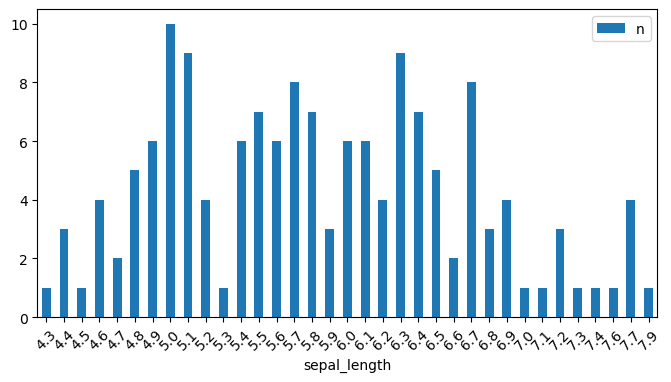

In [50]:
SEPAL_LENGTH.sort_index().plot.bar(figsize=(8,4), rot=45);

You can see that this method produces similar results to a histogram:

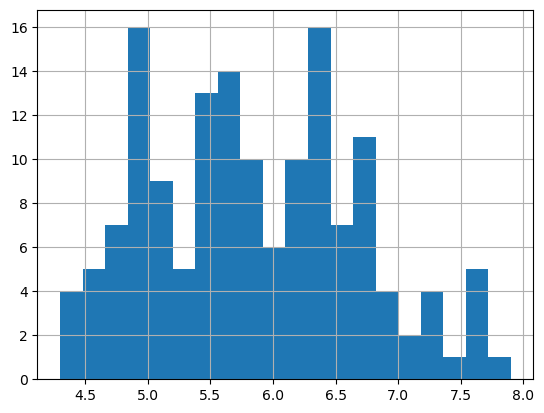

In [80]:
iris.sepal_length.hist(bins=20);

### `.mean()`

Statistical properties are easily computed.

Operations like this generally exclude missing data.

So, it is import to convert missing data to values if they need to be considered in the denominator.

In [52]:
iris.sepal_length.mean()

5.843333333333334

### `.max()`

In [53]:
iris.sepal_length.max()

7.9

### `.std()`

This standard deviation.

In [54]:
iris.sepal_length.std()

0.828066127977863

### `.corr()`

We may get the correlations among features with `.corr()`:

In [55]:
# iris.corr() # Won't work because of string column

In [82]:
iris.corr(numeric_only=True, method='pearson') 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [57]:
iris_w_idx.corr() # This works because we moved the string into the index

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Note that the `method` parameter defaults to `pearson`. 

You may also use `spearman`, `kendall`, or a custom function.

Correlation can be computed on two columns, or features, by subsetting on them:

In [58]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


Here we correlate three features:

In [59]:
iris[['sepal_length','petal_length','sepal_width']].corr()

,sepal_length,petal_length,sepal_width
sepal_length,1.000000,0.871754,-0.11757
petal_length,0.871754,1.000000,-0.42844
sepal_width,-0.117570,-0.428440,1.00000


## Styling

Pandas provides methods for styling DataFrames as quick way to visualize data.

In [60]:
iris.corr(numeric_only=True).style.background_gradient(cmap="Blues", axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Visualization with `.plot()`

The `.plot()` method allows for quick visualizations such as scatterplots, bar charts, and histograms.

We will cover visualization separately in more detail.

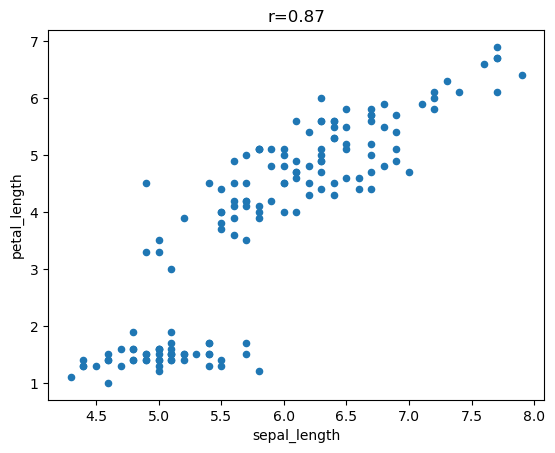

In [90]:
my_features = ['sepal_length', 'petal_length']
my_title = f"r={round(iris[features].corr().iloc[0,1], 2)}" 
iris.plot.scatter(*my_features, title=my_title);

Here we plot all the data as points.

Note how `.plot()` color codes the features for us.

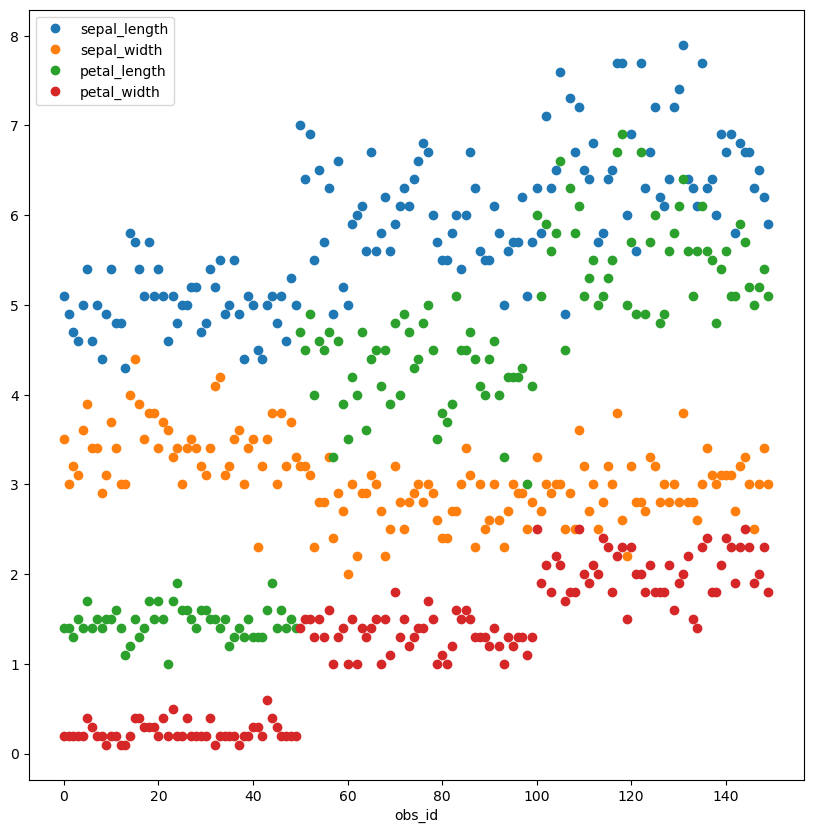

In [87]:
iris.sort_values(list(iris.columns)).plot(style='o', figsize=(10,10));

Here we use Seaborn's scatter matrix function.

In [63]:
from pandas.plotting import scatter_matrix

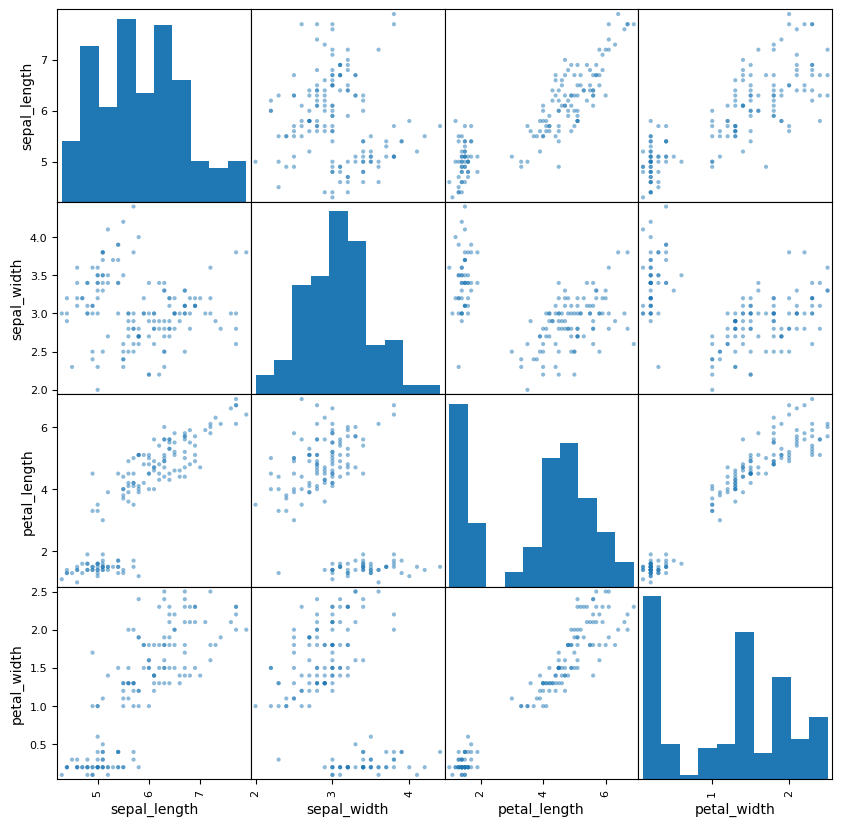

In [64]:
scatter_matrix(iris, figsize=(10,10));

## Saving to a CSV File

It is common practice to save a DataFrame to a CSV file. 

Use `.to_csv()` for this.

In [101]:
iris_w_idx.to_csv('./iris_data.csv', index=True)

There are also options to save to a database, other file formats, even the clipboard.

A file path is required; it will create the file if it does not exist, or overwrite it if it does.

You may also append by passing `a` to the `mode` parameter.

Other optional parameters include:

`sep`: to set the delimiter to something other than a comma, e.g. a pipe `|` or tab `\t`.

`index`: to save the index column(s) or not.

## Reading from a CSV File

`.read_csv()` reads from CSV into DataFrame

In [99]:
iris_loaded = pd.read_csv('./iris_data.csv').set_index('obs_id')

In [97]:
iris_loaded.head()

,species,sepal_length,sepal_width,petal_length,petal_width
obs_id,,,,,
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


Note we apply the `.set_index()` method immediately.